In [1]:
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import csv

In [2]:
# Save file path to variable
healthspend_csv = "healthspend.csv"
happymerge_csv = "avg_happiness.csv"
populations_csv = "population_df.csv"

# Read Healthcare CSV
# Read Happiness CSV 

In [3]:
# # Read with Pandas
healthspend__df = pd.read_csv(healthspend_csv)
healthspend__df.head(15)

,Countries,Indicators,avg (2014-2018)
0,Algeria,Capital health expenditure,18
1,Benin,Capital health expenditure,44
2,Botswana,Capital health expenditure,14
3,Burkina Faso,Capital health expenditure,41
4,Burundi,Capital health expenditure,5
5,Cabo Verde Republic of,Capital health expenditure,8
6,Cameroon,Capital health expenditure,156
7,Central African Republic,Capital health expenditure,1
8,Congo,Capital health expenditure,113
9,Côte d'Ivoire,Capital health expenditure,182


In [4]:
healthspend__df=healthspend__df.dropna()

In [5]:
# # Read with Pandas
happymerge_csv_df = pd.read_csv(happymerge_csv)
happymerge_csv_df.head(15)
# Get a list of all of our columns for easy reference

,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness
0,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5114
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.5110
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.5460
3,Norway,7.522,7.498,7.537,7.594,7.554,7.5410
4,Canada,7.427,7.404,7.316,7.328,7.278,7.3506
5,Finland,7.406,7.413,7.469,7.632,7.769,7.5378
6,Netherlands,7.378,7.339,7.377,7.441,7.488,7.4046
7,Sweden,7.364,7.291,7.284,7.314,7.343,7.3192
8,New Zealand,7.286,7.334,7.314,7.324,7.307,7.3130
9,Australia,7.284,7.313,7.284,7.272,7.228,7.2762


In [6]:
# # Read with Pandas
populations_csv_df = pd.read_csv(populations_csv)
populations_csv_df.head(15)
# Get a list of all of our columns for easy reference

,Countries,Indicators,avg (2014-2018)
0,Algeria,Population (in thousands),40564
1,Angola,Population (in thousands),28859
2,Benin,Population (in thousands),10879
3,Botswana,Population (in thousands),2166
4,Burkina Faso,Population (in thousands),18658
5,Burundi,Population (in thousands),10499
6,Cabo Verde Republic of,Population (in thousands),531
7,Cameroon,Population (in thousands),23938
8,Central African Republic,Population (in thousands),4551
9,Chad,Population (in thousands),14566


In [7]:
populations_csv_df=populations_csv_df.dropna()

In [8]:
#merge health and pop 
health_data_complete = pd.merge(populations_csv_df, healthspend__df, how="inner", on=["Countries"])

In [9]:
health_data_complete=health_data_complete.dropna()
health_data_complete

,Countries,Indicators_x,avg (2014-2018)_x,Indicators_y,avg (2014-2018)_y
0,Algeria,Population (in thousands),40564,Capital health expenditure,18
1,Benin,Population (in thousands),10879,Capital health expenditure,44
2,Botswana,Population (in thousands),2166,Capital health expenditure,14
3,Burkina Faso,Population (in thousands),18658,Capital health expenditure,41
4,Burundi,Population (in thousands),10499,Capital health expenditure,5
...,...,...,...,...,...
151,Solomon Islands,Population (in thousands),620,Capital health expenditure,2
152,Tonga,Population (in thousands),102,Capital health expenditure,0
153,Tuvalu,Population (in thousands),11,Capital health expenditure,1
154,Vanuatu,Population (in thousands),278,Capital health expenditure,0


In [10]:
# Rename  _x columns 
health_data_complete = health_data_complete.rename(columns={"Indicators_x":"Indicates Population",
                                                              "avg (2014-2018)_x":"Avg Pop"})
                                

In [11]:
# Rename _y columns
health_data_complete = health_data_complete.rename(columns={"Indicators_y":"Indicates Expenditure",
                                                              "avg (2014-2018)_y":"Avg Spend"})

In [12]:
# Rename Counties column
health_data_complete = health_data_complete.rename(columns={"Countries":"Country"})
                                                              

In [13]:
health_data_complete

,Country,Indicates Population,Avg Pop,Indicates Expenditure,Avg Spend
0,Algeria,Population (in thousands),40564,Capital health expenditure,18
1,Benin,Population (in thousands),10879,Capital health expenditure,44
2,Botswana,Population (in thousands),2166,Capital health expenditure,14
3,Burkina Faso,Population (in thousands),18658,Capital health expenditure,41
4,Burundi,Population (in thousands),10499,Capital health expenditure,5
...,...,...,...,...,...
151,Solomon Islands,Population (in thousands),620,Capital health expenditure,2
152,Tonga,Population (in thousands),102,Capital health expenditure,0
153,Tuvalu,Population (in thousands),11,Capital health expenditure,1
154,Vanuatu,Population (in thousands),278,Capital health expenditure,0


In [14]:
#merge health pop and happy
happy_health_df = pd.merge(happymerge_csv_df, health_data_complete, how="left", on=["Country"])

In [15]:
happy_health_df=happy_health_df.dropna()
happy_health_df

,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness,Indicates Population,Avg Pop,Indicates Expenditure,Avg Spend
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.5110,Population (in thousands),332.0,Capital health expenditure,55.0
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.5460,Population (in thousands),5705.0,Capital health expenditure,2016.0
3,Norway,7.522,7.498,7.537,7.594,7.554,7.5410,Population (in thousands),5208.0,Capital health expenditure,2155.0
4,Canada,7.427,7.404,7.316,7.328,7.278,7.3506,Population (in thousands),36376.0,Capital health expenditure,7648.0
5,Finland,7.406,7.413,7.469,7.632,7.769,7.5378,Population (in thousands),5495.0,Capital health expenditure,1087.0
...,...,...,...,...,...,...,...,...,...,...,...
134,Burkina Faso,3.587,3.739,4.032,4.424,4.587,4.0738,Population (in thousands),18658.0,Capital health expenditure,41.0
135,Afghanistan,3.575,3.360,3.794,3.632,3.203,3.5128,Population (in thousands),35327.0,Capital health expenditure,44.0
137,Benin,3.340,3.484,3.657,4.141,4.883,3.9010,Population (in thousands),10879.0,Capital health expenditure,44.0
139,Burundi,2.905,2.905,2.905,2.905,3.775,3.0790,Population (in thousands),10499.0,Capital health expenditure,5.0


In [16]:
#add column for spend per population
happy_health_df["Spend/Population"]= happy_health_df['Avg Spend']/happy_health_df['Avg Pop']

In [17]:
happy_health_df

,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness,Indicates Population,Avg Pop,Indicates Expenditure,Avg Spend,Spend/Population
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.5110,Population (in thousands),332.0,Capital health expenditure,55.0,0.165663
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.5460,Population (in thousands),5705.0,Capital health expenditure,2016.0,0.353374
3,Norway,7.522,7.498,7.537,7.594,7.554,7.5410,Population (in thousands),5208.0,Capital health expenditure,2155.0,0.413786
4,Canada,7.427,7.404,7.316,7.328,7.278,7.3506,Population (in thousands),36376.0,Capital health expenditure,7648.0,0.210249
5,Finland,7.406,7.413,7.469,7.632,7.769,7.5378,Population (in thousands),5495.0,Capital health expenditure,1087.0,0.197816
...,...,...,...,...,...,...,...,...,...,...,...,...
134,Burkina Faso,3.587,3.739,4.032,4.424,4.587,4.0738,Population (in thousands),18658.0,Capital health expenditure,41.0,0.002197
135,Afghanistan,3.575,3.360,3.794,3.632,3.203,3.5128,Population (in thousands),35327.0,Capital health expenditure,44.0,0.001246
137,Benin,3.340,3.484,3.657,4.141,4.883,3.9010,Population (in thousands),10879.0,Capital health expenditure,44.0,0.004044
139,Burundi,2.905,2.905,2.905,2.905,3.775,3.0790,Population (in thousands),10499.0,Capital health expenditure,5.0,0.000476


The r-squared is: 0.463953671582372


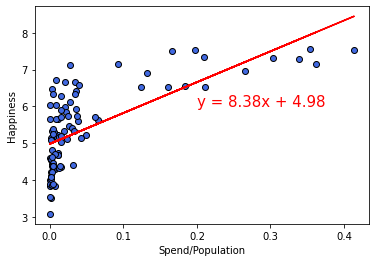

In [34]:
#perform analysis on spend/pop vs happiness
x_values = happy_health_df['Spend/Population']
y_values = happy_health_df['Avg Happiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "royalblue", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.2, 6),fontsize=15,color="red")
plt.xlabel('Spend/Population')
plt.ylabel('Happiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [19]:
#determine outliers
spend_data = happy_health_df['Spend/Population']
quartiles = spend_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of spend is: {lowerq}")
print(f"The upper quartile of spend is: {upperq}")
print(f"The interquartile range of spend is: {iqr}")
print(f"The the median of spend is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_spend = happy_health_df.loc[(spend_data < lower_bound) | (spend_data > upper_bound)]
print(outlier_spend)

The lower quartile of spend is: 0.003021711041432039
The upper quartile of spend is: 0.03385996630695308
The interquartile range of spend is: 0.03083825526552104
The the median of spend is: 0.010964718365903263 
Values below -0.04323567185684952 could be outliers.
Values above 0.08011734920523464 could be outliers.
           Country  Happiness Score_2015  Happiness Score_2016  \
1          Iceland                 7.561                 7.501   
2          Denmark                 7.527                 7.526   
3           Norway                 7.522                 7.498   
4           Canada                 7.427                 7.404   
5          Finland                 7.406                 7.413   
7           Sweden                 7.364                 7.291   
9        Australia                 7.284                 7.313   
10          Israel                 7.278                 7.267   
12         Austria                 7.200                 7.119   
17         Ireland     

In [ ]:
# # Example outlier plot of reaction times
# times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
# fig1, ax1 = plt.subplots()
# ax1.set_title('Reaction Times at Baseball Batting Cage')
# ax1.set_ylabel('Reaction Time (ms)')
# ax1.boxplot(times)
# plt.show()


# # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# fig1, ax1= plt.subplots()
# ax1.set_title("Tumor volume across regimens")
# ax1.set_ylabel("final tumor volume per regimen")
# ax1.boxplot(volumes)
# plt.show()

The r-squared is: 0.0054772995610195205


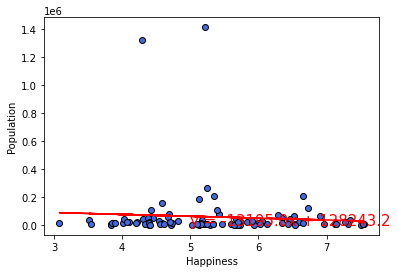

In [33]:
#perform analysis on happiness vs population 
x_values = happy_health_df['Avg Happiness']
y_values = happy_health_df['Avg Pop']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "royalblue", edgecolor = "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,.6),fontsize=15,color="red")
plt.xlabel('Happiness')
plt.ylabel('Population')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [25]:
#determine outliers in population
pop_data = happy_health_df['Avg Pop']
quartiles = pop_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of spend is: {lowerq}")
print(f"The upper quartile of spend is: {upperq}")
print(f"The interquartile range of spend is: {iqr}")
print(f"The the median of spend is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_pop = happy_health_df.loc[(pop_data < lower_bound) | (pop_data > upper_bound)]
print(outlier_pop)

The lower quartile of spend is: 5571.0
The upper quartile of spend is: 35223.0
The interquartile range of spend is: 29652.0
The the median of spend is: 10879.0 
Values below -38907.0 could be outliers.
Values above 79701.0 could be outliers.
         Country  Happiness Score_2015  Happiness Score_2016  \
13        Mexico                 7.187                 6.778   
15        Brazil                 6.983                 6.952   
67     Indonesia                 5.399                 5.314   
69        Turkey                 5.332                 5.389   
71       Nigeria                 5.268                 4.875   
74      Pakistan                 5.194                 5.132   
77         China                 5.140                 5.245   
83   Philippines                 5.073                 5.279   
96    Bangladesh                 4.694                 4.643   
104        India                 4.565                 4.404   
108     Ethiopia                 4.512                